In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager

In [2]:
data = pd.read_excel('2021-2022.xlsx')[['Minute','X','Y','xG','situation','Shot Type','Player Assisted','player','result','team','opponent']]
data

,Minute,X,Y,xG,situation,Shot Type,Player Assisted,player,result,team,opponent
0,3,0.822,0.488,0.065826,OpenPlay,LeftFoot,Alassane Pléa,Patrick Herrmann,MissedShots,Borussia M.Gladbach,Bayern Munich
1,9,0.878,0.557,0.384534,OpenPlay,LeftFoot,Lars Stindl,Alassane Pléa,Goal,Borussia M.Gladbach,Bayern Munich
2,22,0.901,0.514,0.081374,SetPiece,LeftFoot,NaN,Nico Elvedi,MissedShots,Borussia M.Gladbach,Bayern Munich
3,29,0.748,0.713,0.018639,OpenPlay,LeftFoot,NaN,Lars Stindl,MissedShots,Borussia M.Gladbach,Bayern Munich
4,53,0.925,0.443,0.082909,SetPiece,Head,Patrick Herrmann,Stefan Lainer,MissedShots,Borussia M.Gladbach,Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...
3302,56,0.862,0.343,0.053305,OpenPlay,LeftFoot,Thomas Müller,Kingsley Coman,SavedShot,Bayern Munich,Borussia Dortmund
3303,61,0.819,0.636,0.038622,OpenPlay,RightFoot,Alphonso Davies,Thomas Müller,BlockedShot,Bayern Munich,Borussia Dortmund
3304,76,0.885,0.500,0.757777,Penalty,RightFoot,NaN,Robert Lewandowski,Goal,Bayern Munich,Borussia Dortmund
3305,96,0.747,0.700,0.045128,DirectFreekick,RightFoot,NaN,Robert Lewandowski,MissedShots,Bayern Munich,Borussia Dortmund


In [3]:
data['X'] = data['X']*100
data['Y'] = data['Y']*100
data['X'] = data['X']*1.205
data['Y'] = data['Y']*0.86

data

,Minute,X,Y,xG,situation,Shot Type,Player Assisted,player,result,team,opponent
0,3,99.050996,41.967999,0.065826,OpenPlay,LeftFoot,Alassane Pléa,Patrick Herrmann,MissedShots,Borussia M.Gladbach,Bayern Munich
1,9,105.799004,47.902001,0.384534,OpenPlay,LeftFoot,Lars Stindl,Alassane Pléa,Goal,Borussia M.Gladbach,Bayern Munich
2,22,108.570498,44.204001,0.081374,SetPiece,LeftFoot,NaN,Nico Elvedi,MissedShots,Borussia M.Gladbach,Bayern Munich
3,29,90.134004,61.318003,0.018639,OpenPlay,LeftFoot,NaN,Lars Stindl,MissedShots,Borussia M.Gladbach,Bayern Munich
4,53,111.462500,38.097999,0.082909,SetPiece,Head,Patrick Herrmann,Stefan Lainer,MissedShots,Borussia M.Gladbach,Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...
3302,56,103.870996,29.497999,0.053305,OpenPlay,LeftFoot,Thomas Müller,Kingsley Coman,SavedShot,Bayern Munich,Borussia Dortmund
3303,61,98.689502,54.695999,0.038622,OpenPlay,RightFoot,Alphonso Davies,Thomas Müller,BlockedShot,Bayern Munich,Borussia Dortmund
3304,76,106.642500,43.000000,0.757777,Penalty,RightFoot,NaN,Robert Lewandowski,Goal,Bayern Munich,Borussia Dortmund
3305,96,90.013496,60.200000,0.045128,DirectFreekick,RightFoot,NaN,Robert Lewandowski,MissedShots,Bayern Munich,Borussia Dortmund


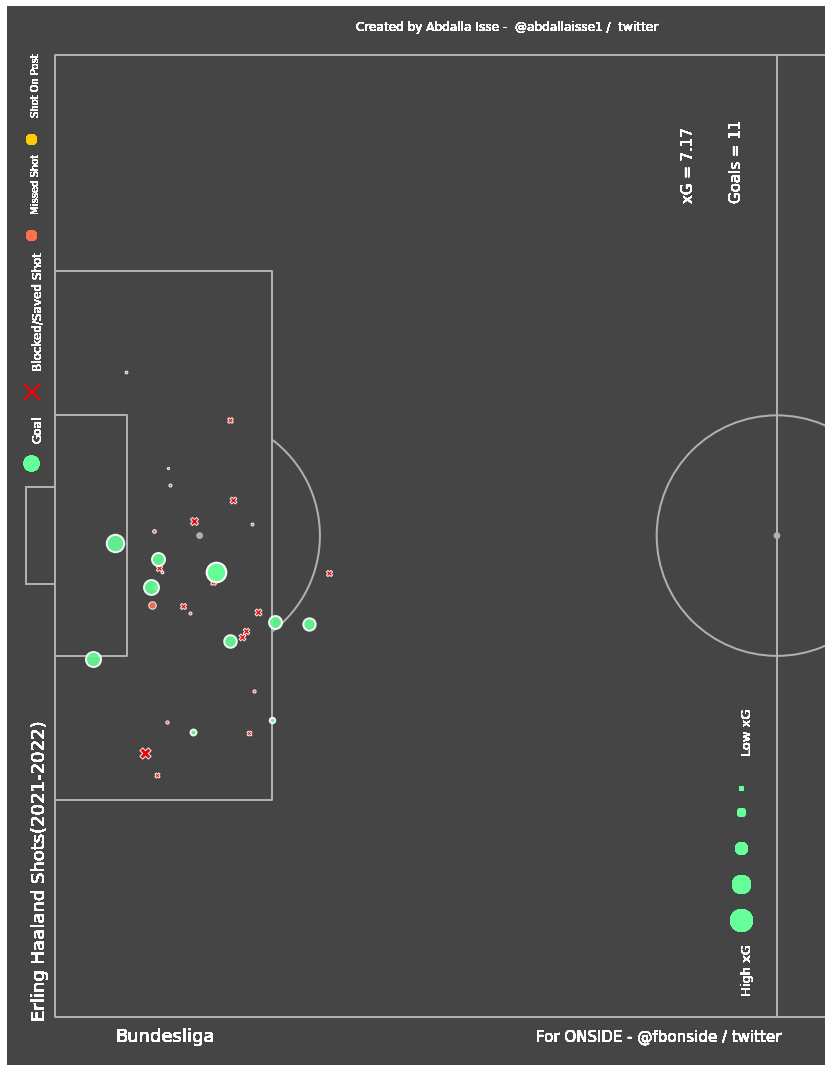

In [4]:
#Player Shots

pitch = Pitch(goal_type='box', half=True,pitch_color='#454545')
fig, ax = pitch.draw(figsize=(21, 15))
plt.gca().invert_xaxis()
player_goals = data[(data['result'].isin(['Goal'])) & (data['player'] == 'Erling Haaland')]
player_missed_shots = data[(data['result'].isin(['MissedShots'])) & (data['player'] == 'Erling Haaland')]
player_shots = data[data['player'] == 'Erling Haaland']
player_xG = round(sum(player_shots['xG']),2)
for x in range(len(data['X'])):
        if data['player'][x] == 'Erling Haaland':    
            plt.text(80,82, 'For ONSIDE - @fbonside / twitter',fontsize=15, color='white')
            plt.text(95,-2, 'Created by Abdalla Isse -  @abdallaisse1 /  twitter',fontsize=12, color='white')
            plt.text(115,82, 'Bundesliga',fontsize=18, color='white')
            plt.text(122,80, 'Erling Haaland Shots(2021-2022)',fontsize=18, color='white',rotation=90)
            ax.plot(122, 34, 'o', ms=15, color='#66ff99')
            plt.text(122,32, 'Goal',fontsize=12, color='white',rotation=90)
            ax.plot(122, 28, 'x', ms=15, color='#ff0000')
            plt.text(122,26, 'Blocked/Saved Shot',fontsize=12, color='white',rotation=90)
            ax.plot(122, 15, 'o', ms=10, color='#ff704d')
            plt.text(122,13, 'Missed Shot',fontsize=10, color='white',rotation=90)
            ax.plot(122, 7, 'o', ms=10, color='#ffcc00')
            plt.text(122,5, 'Shot On Post',fontsize=10, color='white',rotation=90)
            plt.text(68,12, 'xG = '+str(player_xG),fontsize=15, color='white',rotation=90)
            plt.text(64,12, 'Goals = '+str(player_goals['result'].count()),fontsize=15, color='white',rotation=90)
            #plt.text(61,12, 'Missed Chances = '+str(player_missed_shots['result'].count()),fontsize=15, color='white',rotation=90)
            plt.text(63,78 ,'High xG',fontsize=13, color='white',rotation=90)
            ax.plot(63,72 ,'o', ms=22, color='#66ff99')
            ax.plot(63,69 ,'o', ms=18, color='#66ff99')
            ax.plot(63,66 ,'o', ms=12, color='#66ff99')
            ax.plot(63,63 ,'o', ms=8, color='#66ff99')
            ax.plot(63,61 ,'o', ms=4, color='#66ff99')
            plt.text(63,58, 'Low xG',fontsize=13, color='white',rotation=90)
            if data['result'][x] == 'Goal': 
                plt.scatter(data['X'][x],data['Y'][x],color = '#66ff99',s=data['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)
                #plt.text(data['X'][x],data['Y'][x],data['player'][x],fontsize=9, color='white') 
            elif data['result'][x] == 'BlockedShot' or data['result'][x] == 'SavedShot':
                plt.scatter(data['X'][x],data['Y'][x],marker='X',color = '#ff0000',s=data['xG'][x]*500,edgecolor='white',alpha=.9)
            elif data['result'][x] == 'MissedShots':
                plt.scatter(data['X'][x],data['Y'][x],color = '#ff704d',s=data['xG'][x]*100,edgecolor='white',alpha=.9)
            elif data['result'][x] == 'ShotOnPost':
                plt.scatter(data['X'][x],data['Y'][x],color = '#ffcc00',s=data['xG'][x]*100,edgecolor='white',alpha=.9)

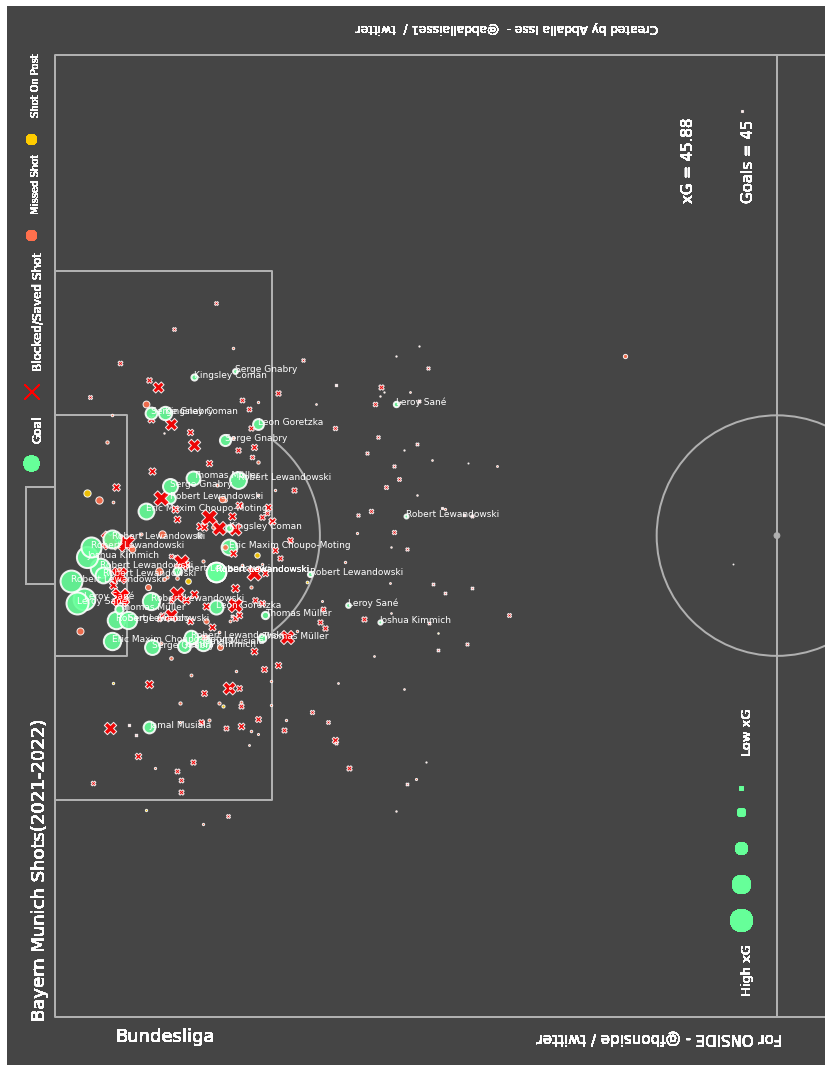

In [5]:
#Team Shots

pitch = Pitch(goal_type='box', half=True,pitch_color='#454545')
fig, ax = pitch.draw(figsize=(21, 15))
plt.gca().invert_xaxis()
team_goals = data[(data['result'].isin(['Goal'])) & (data['team'] == 'Bayern Munich')]
team_own_goals = data[(data['result'].isin(['OwnGoal'])) & (data['opponent'] == 'Bayern Munich') ]
team_shots = data[data['team'] == 'Bayern Munich']
team_xG = round(sum(team_shots['xG']),2)
for x in range(len(data['X'])):
        if data['team'][x] == 'Bayern Munich':    
            plt.text(80,82, 'For ONSIDE - @fbonside / twitter',fontsize=15, color='white',rotation=180)
            plt.text(95,-2, 'Created by Abdalla Isse -  @abdallaisse1 /  twitter',fontsize=12, color='white',rotation=180)
            plt.text(115,82, 'Bundesliga',fontsize=18, color='white')
            plt.text(122,80, 'Bayern Munich Shots(2021-2022)',fontsize=18, color='white',rotation=90)
            ax.plot(122, 34, 'o', ms=15, color='#66ff99')
            plt.text(122,32, 'Goal',fontsize=12, color='white',rotation=90)
            ax.plot(122, 28, 'x', ms=15, color='#ff0000')
            plt.text(122,26, 'Blocked/Saved Shot',fontsize=12, color='white',rotation=90)
            ax.plot(122, 15, 'o', ms=10, color='#ff704d')
            plt.text(122,13, 'Missed Shot',fontsize=10, color='white',rotation=90)
            ax.plot(122, 7, 'o', ms=10, color='#ffcc00')
            plt.text(122,5, 'Shot On Post',fontsize=10, color='white',rotation=90)
            plt.text(68,12, 'xG = '+str(team_xG),fontsize=15, color='white',rotation=90)
            plt.text(63,12, 'Goals = '+str(team_goals['result'].count()+team_own_goals['result'].count()),fontsize=15, color='white',rotation=90)
            plt.text(63,78 ,'High xG',fontsize=13, color='white',rotation=90)
            ax.plot(63,72 ,'o', ms=22, color='#66ff99')
            ax.plot(63,69 ,'o', ms=18, color='#66ff99')
            ax.plot(63,66 ,'o', ms=12, color='#66ff99')
            ax.plot(63,63 ,'o', ms=8, color='#66ff99')
            ax.plot(63,61 ,'o', ms=4, color='#66ff99')
            plt.text(63,58, 'Low xG',fontsize=13, color='white',rotation=90)
            if data['result'][x] == 'Goal': 
                plt.scatter(data['X'][x],data['Y'][x],color = '#66ff99',s=data['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)
                plt.text(data['X'][x],data['Y'][x],data['player'][x],fontsize=9, color='white') 
            elif data['result'][x] == 'BlockedShot' or data['result'][x] == 'SavedShot':
                plt.scatter(data['X'][x],data['Y'][x],marker='X',color = '#ff0000',s=data['xG'][x]*500,edgecolor='white',alpha=.9)
            elif data['result'][x] == 'MissedShots':
                plt.scatter(data['X'][x],data['Y'][x],color = '#ff704d',s=data['xG'][x]*100,edgecolor='white',alpha=.9)
            elif data['result'][x] == 'ShotOnPost':
                plt.scatter(data['X'][x],data['Y'][x],color = '#ffcc00',s=data['xG'][x]*100,edgecolor='white',alpha=.9)